# **Cat Behavior Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.decomposition import FactorAnalysis
from sklearn.neural_network import MLPClassifier as mlp

# Exploratory Data Analysis

In [2]:
df = pd.read_excel('Cat_Data.xlsx')
df.head()

,Row.names,Parliament,Sex,Age,Breed,Number,Accommodation,Area,Outdoor,Obs,...,Brutal,Dominant,Aggressive,Impulsive,Predictable,Distracted,Abundance,Predoiseau,Predmamm,More
0,1,2021-02-09 16:36:39,F,Moinsde1,SBI,3,ASB,U,0,0,...,1,1,1,1,1,1,NSP,4,4,NaN
1,10,2021-02-12 18:25:58,F,Moinsde1,SBI,1,AAB,U,0,2,...,2,2,3,4,4,3,NSP,0,0,NaN
2,100,2021-03-06 22:04:33,F,2a10,EUR,4,ML,U,0,2,...,1,1,1,2,4,2,NSP,0,0,"Elle ne chasse pas car elle ne sort pas, si el..."
3,1000,2021-02-18 16:10:11,F,Moinsde1,EUR,1,ML,R,2,2,...,4,3,3,3,4,4,3,0,0,Elle vient quand je l'appelle
4,1001,2021-02-18 18:00:51,F,1a2,SBI,2,MI,R,1,2,...,2,4,1,4,3,3,3,0,0,NaN


In [3]:
#first we have to understand our data set
df.shape

(3143, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row.names      3143 non-null   int64         
 1   Parliament     3143 non-null   datetime64[ns]
 2   Sex            3143 non-null   object        
 3   Age            3143 non-null   object        
 4   Breed          3143 non-null   object        
 5   Number         3143 non-null   object        
 6   Accommodation  3143 non-null   object        
 7   Area           3143 non-null   object        
 8   Outdoor        3143 non-null   int64         
 9   Obs            3143 non-null   int64         
 10  Timid          3143 non-null   int64         
 11  Calm           3143 non-null   int64         
 12  Afraid         3143 non-null   int64         
 13  Intelligent    3143 non-null   int64         
 14  Vigilant       3143 non-null   int64         
 15  Perseverant    3143 n

In [5]:
print(df.isnull().sum())  # Total missing values per column

Row.names           0
Parliament          0
Sex                 0
Age                 0
Breed               0
Number              0
Accommodation       0
Area                0
Outdoor             0
Obs                 0
Timid               0
Calm                0
Afraid              0
Intelligent         0
Vigilant            0
Perseverant         0
Affectionate        0
Friendly            0
Lonely              0
Brutal              0
Dominant            0
Aggressive          0
Impulsive           0
Predictable         0
Distracted          0
Abundance           0
Predoiseau          0
Predmamm            0
More             2322
dtype: int64


In [6]:
print(df.isnull().mean() * 100)  # Percentage of missing values per column


Row.names         0.00000
Parliament        0.00000
Sex               0.00000
Age               0.00000
Breed             0.00000
Number            0.00000
Accommodation     0.00000
Area              0.00000
Outdoor           0.00000
Obs               0.00000
Timid             0.00000
Calm              0.00000
Afraid            0.00000
Intelligent       0.00000
Vigilant          0.00000
Perseverant       0.00000
Affectionate      0.00000
Friendly          0.00000
Lonely            0.00000
Brutal            0.00000
Dominant          0.00000
Aggressive        0.00000
Impulsive         0.00000
Predictable       0.00000
Distracted        0.00000
Abundance         0.00000
Predoiseau        0.00000
Predmamm          0.00000
More             73.87846
dtype: float64


In [7]:
# Dropping columns we know from the start are irrelevant to us
columns_to_drop = ['Row.names', 'Parliament', 'More', 'Breed']


df = df.drop(columns=columns_to_drop)


In [8]:
# Row.names: Dropped because it is just an index and does not contribute meaningful information for prediction.
# Parliament: Dropped because it represents a timestamp irrelevant to the analysis of predation behavior.
# More: Dropped due to having a high proportion of missing values (only 821 non-null out of 3143), making it unreliable for modeling.
# Breed: Dropped to avoid introducing bias related to breed, and to further generalize the model since most cat owners might not know the breed of their cat


In [9]:
df.shape
df.head()

,Sex,Age,Number,Accommodation,Area,Outdoor,Obs,Timid,Calm,Afraid,...,Lonely,Brutal,Dominant,Aggressive,Impulsive,Predictable,Distracted,Abundance,Predoiseau,Predmamm
0,F,Moinsde1,3,ASB,U,0,0,1,1,1,...,1,1,1,1,1,1,1,NSP,4,4
1,F,Moinsde1,1,AAB,U,0,2,1,1,3,...,1,2,2,3,4,4,3,NSP,0,0
2,F,2a10,4,ML,U,0,2,4,4,3,...,2,1,1,1,2,4,2,NSP,0,0
3,F,Moinsde1,1,ML,R,2,2,3,2,2,...,3,4,3,3,3,4,4,3,0,0
4,F,1a2,2,MI,R,1,2,1,4,1,...,1,2,4,1,4,3,3,3,0,0


In [10]:
#further do feature selection. lets test the categorical features


# Define the columns to test
columns_to_test = ['Sex', 'Age', 'Area', 'Abundance', 'Accommodation', 'Number', 'Outdoor']

# Function to run ANOVA for both target variables
def run_anova(column, target1, target2):
    print(f"\nANOVA results for {column}:")

    # ANOVA for Predoiseau
    groups_predoiseau = [df[df[column] == cat][target1] for cat in df[column].unique()]
    f_stat_predoiseau, p_value_predoiseau = f_oneway(*groups_predoiseau)
    print(f"  {target1} - F-statistic: {f_stat_predoiseau}, p-value: {p_value_predoiseau}")

    # ANOVA for Predmamm
    groups_predmamm = [df[df[column] == cat][target2] for cat in df[column].unique()]
    f_stat_predmamm, p_value_predmamm = f_oneway(*groups_predmamm)
    print(f"  {target2} - F-statistic: {f_stat_predmamm}, p-value: {p_value_predmamm}")




In [11]:
# Run ANOVA tests for all columns
for column in columns_to_test:
    run_anova(column, 'Predoiseau', 'Predmamm')


ANOVA results for Sex:
  Predoiseau - F-statistic: 4.508834959682271, p-value: 0.011082666849820458
  Predmamm - F-statistic: 4.284369622916389, p-value: 0.013862964312317979

ANOVA results for Age:
  Predoiseau - F-statistic: 29.98517472036175, p-value: 4.1565333056196377e-19
  Predmamm - F-statistic: 31.02133131413673, p-value: 9.329703936251884e-20

ANOVA results for Area:
  Predoiseau - F-statistic: 89.76018893964755, p-value: 1.2338580065533955e-38
  Predmamm - F-statistic: 140.82906608173317, p-value: 2.6795431495641175e-59

ANOVA results for Abundance:
  Predoiseau - F-statistic: 161.06022116522158, p-value: 4.2100807706120225e-97
  Predmamm - F-statistic: 222.14647772092982, p-value: 1.0999712977313105e-130

ANOVA results for Accommodation:
  Predoiseau - F-statistic: 99.51818867517608, p-value: 1.5541565752845585e-61
  Predmamm - F-statistic: 137.85391781628883, p-value: 6.658201535216674e-84

ANOVA results for Number:
  Predoiseau - F-statistic: 7.821948754326194, p-value: 2

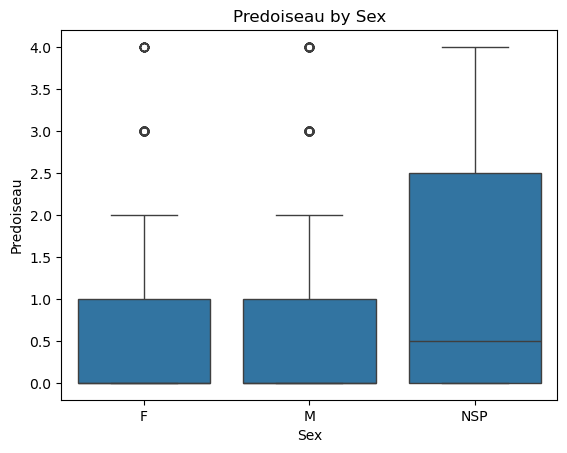

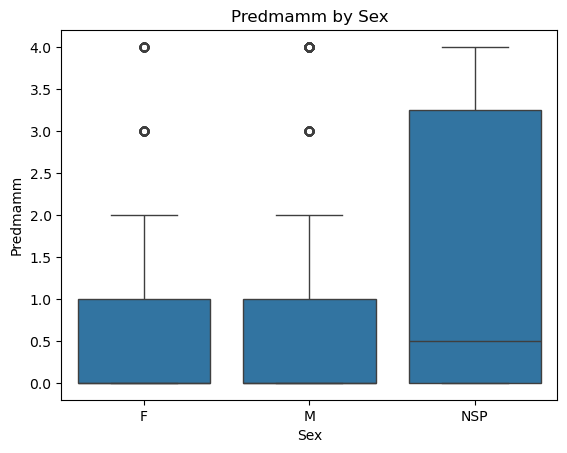

In [12]:
#considering to remove SEX since it shows the weakest significance.

#doing box plots to prove point

# Box plot for Predoiseau vs Sex
sns.boxplot(x='Sex', y='Predoiseau', data=df)
plt.title('Predoiseau by Sex')
plt.show()

# Box plot for Predmamm vs Sex
sns.boxplot(x='Sex', y='Predmamm', data=df)
plt.title('Predmamm by Sex')
plt.show()


First feature to drop:
**Sex**

While **Sex** shows statistical significance, its weaker p-values compared to other features, combined with minimal biological differences in predatory behavior between male and female domestic cats (per the visual) , make it a less impactful predictor

In [13]:
# Remove Sex
df = df.drop(columns=['Sex'])

In [14]:


# Update columns_to_test
columns_to_test = ['Age', 'Area', 'Abundance', 'Accommodation', 'Number','Outdoor']

# Re-run ANOVA for remaining columns
for column in columns_to_test:
    run_anova(column, 'Predoiseau', 'Predmamm')



ANOVA results for Age:
  Predoiseau - F-statistic: 29.98517472036175, p-value: 4.1565333056196377e-19
  Predmamm - F-statistic: 31.02133131413673, p-value: 9.329703936251884e-20

ANOVA results for Area:
  Predoiseau - F-statistic: 89.76018893964755, p-value: 1.2338580065533955e-38
  Predmamm - F-statistic: 140.82906608173317, p-value: 2.6795431495641175e-59

ANOVA results for Abundance:
  Predoiseau - F-statistic: 161.06022116522158, p-value: 4.2100807706120225e-97
  Predmamm - F-statistic: 222.14647772092982, p-value: 1.0999712977313105e-130

ANOVA results for Accommodation:
  Predoiseau - F-statistic: 99.51818867517608, p-value: 1.5541565752845585e-61
  Predmamm - F-statistic: 137.85391781628883, p-value: 6.658201535216674e-84

ANOVA results for Number:
  Predoiseau - F-statistic: 7.821948754326194, p-value: 2.5030666962660364e-07
  Predmamm - F-statistic: 7.060280290706884, p-value: 1.4232496319921635e-06

ANOVA results for Outdoor:
  Predoiseau - F-statistic: 395.6335169613294, p-

In [15]:
df.shape #shape after dropping sex

#double check calculation of the p values

(3143, 24)

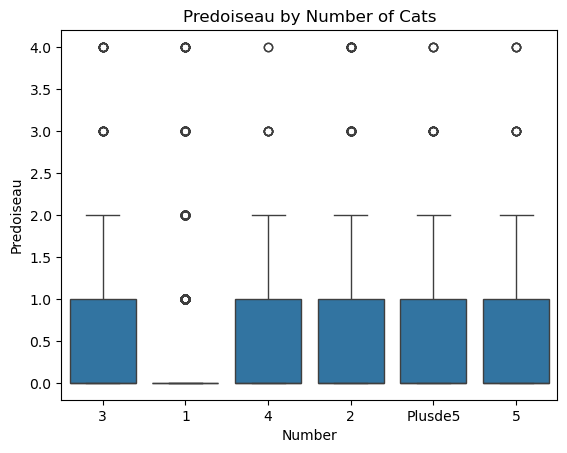

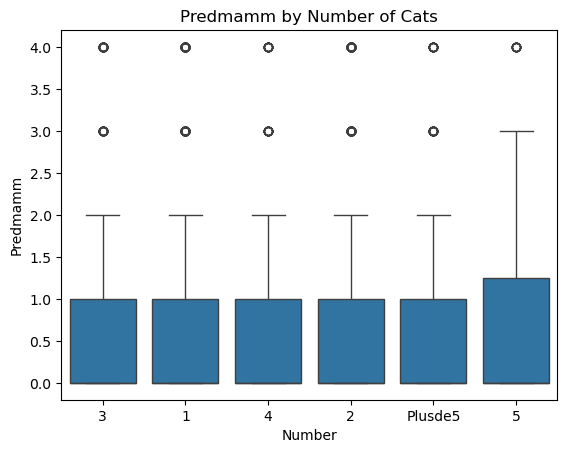

In [16]:
#Now The number of cats in a house hold is the weakest feature.
#lets do box plots to further evaluate its significance

# Box plot for Predoiseau vs Number
sns.boxplot(x='Number', y='Predoiseau', data=df)
plt.title('Predoiseau by Number of Cats')
plt.show()

# Box plot for Predmamm vs Number
sns.boxplot(x='Number', y='Predmamm', data=df)
plt.title('Predmamm by Number of Cats')
plt.show()

Second feature to drop:
**Number**

Although **Number** is statistically significant (per the anova test), the minimal variance observed between categories in the box plots and its relatively weaker contribution compared to other features like Abundance and Area make it a weak predictor for predicting predatory behavior.

In [17]:
df = df.drop(columns=['Number'])



In [18]:

columns_to_test = ['Age', 'Area', 'Abundance', 'Accommodation', 'Outdoor']

for column in columns_to_test:
    run_anova(column, 'Predoiseau', 'Predmamm')


ANOVA results for Age:
  Predoiseau - F-statistic: 29.98517472036175, p-value: 4.1565333056196377e-19
  Predmamm - F-statistic: 31.02133131413673, p-value: 9.329703936251884e-20

ANOVA results for Area:
  Predoiseau - F-statistic: 89.76018893964755, p-value: 1.2338580065533955e-38
  Predmamm - F-statistic: 140.82906608173317, p-value: 2.6795431495641175e-59

ANOVA results for Abundance:
  Predoiseau - F-statistic: 161.06022116522158, p-value: 4.2100807706120225e-97
  Predmamm - F-statistic: 222.14647772092982, p-value: 1.0999712977313105e-130

ANOVA results for Accommodation:
  Predoiseau - F-statistic: 99.51818867517608, p-value: 1.5541565752845585e-61
  Predmamm - F-statistic: 137.85391781628883, p-value: 6.658201535216674e-84

ANOVA results for Outdoor:
  Predoiseau - F-statistic: 395.6335169613294, p-value: 3.007313057097894e-276
  Predmamm - F-statistic: 531.3813173059344, p-value: 0.0


In [19]:
df.shape #shape after dropping number

(3143, 23)

Based on the updated ANOVA results, the remaining features (Age, Area, Abundance, outdoor, and Accommodation) show extremely low p-values for both Predoiseau and Predmamm. This indicates that:

**These Features Are Statistically Significant:**

*  The p-values for all features are much smaller than 0.05, which confirms they are strongly associated with the target variables.

**No Immediate Justification for Further Dropping Features:**


*  The features exhibit strong differentiation across categories, as shown by their high F-statistics.

*  None of these features have weak contributions or overlap to justify removal

In [20]:
# double checking for potential NAN values
print(df.isnull().sum())  # Displays the count of NaN values for each column


Age              0
Accommodation    0
Area             0
Outdoor          0
Obs              0
Timid            0
Calm             0
Afraid           0
Intelligent      0
Vigilant         0
Perseverant      0
Affectionate     0
Friendly         0
Lonely           0
Brutal           0
Dominant         0
Aggressive       0
Impulsive        0
Predictable      0
Distracted       0
Abundance        0
Predoiseau       0
Predmamm         0
dtype: int64


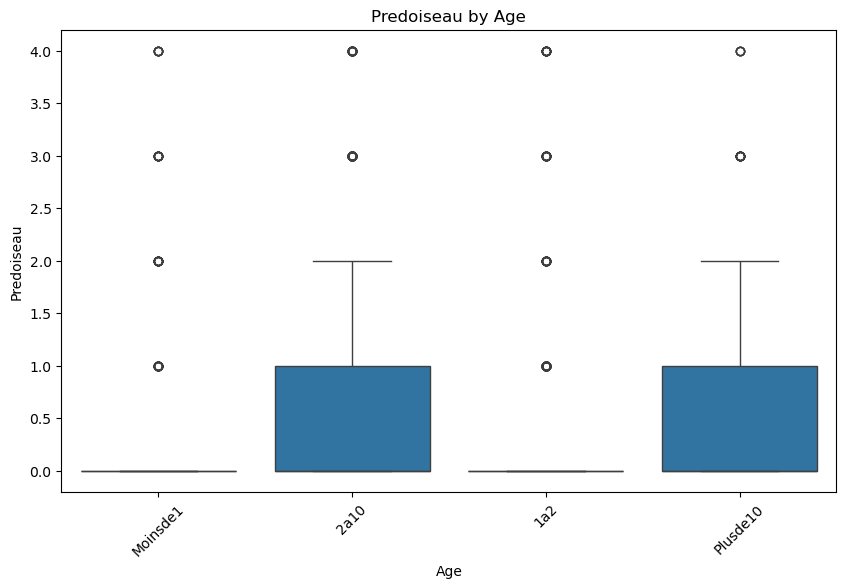

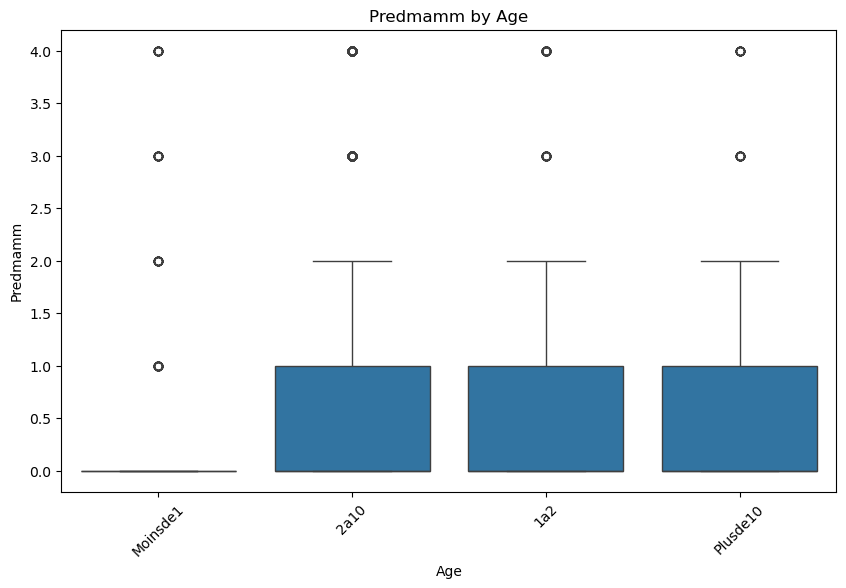

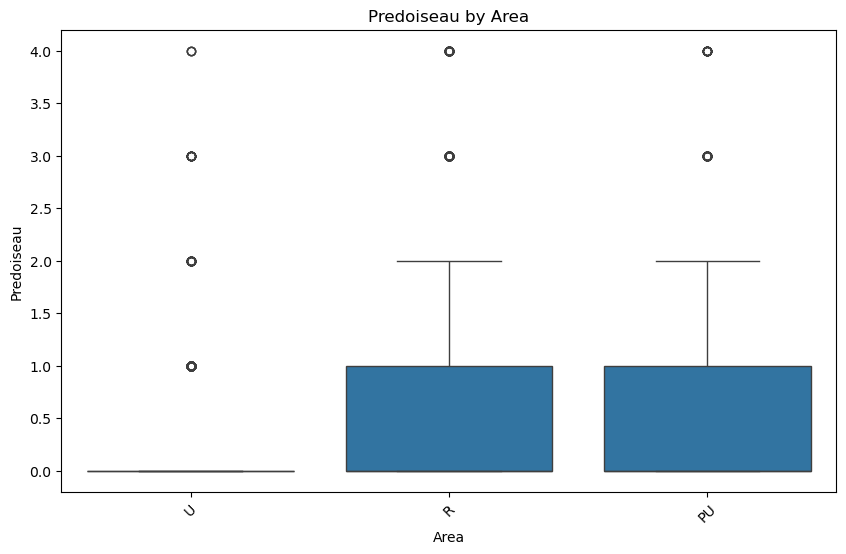

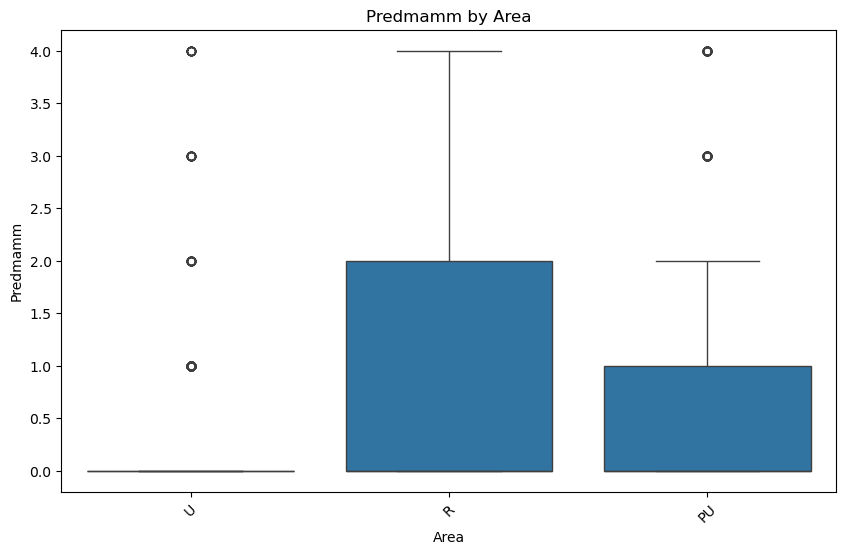

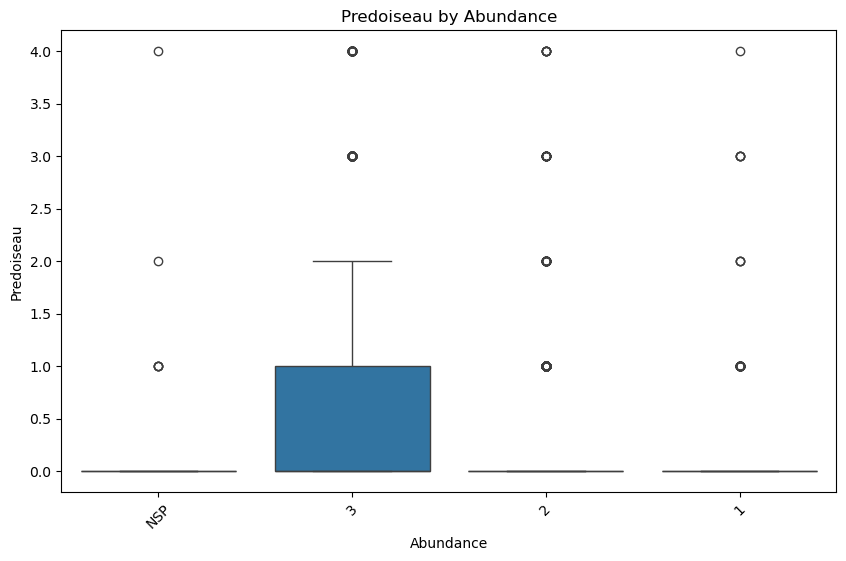

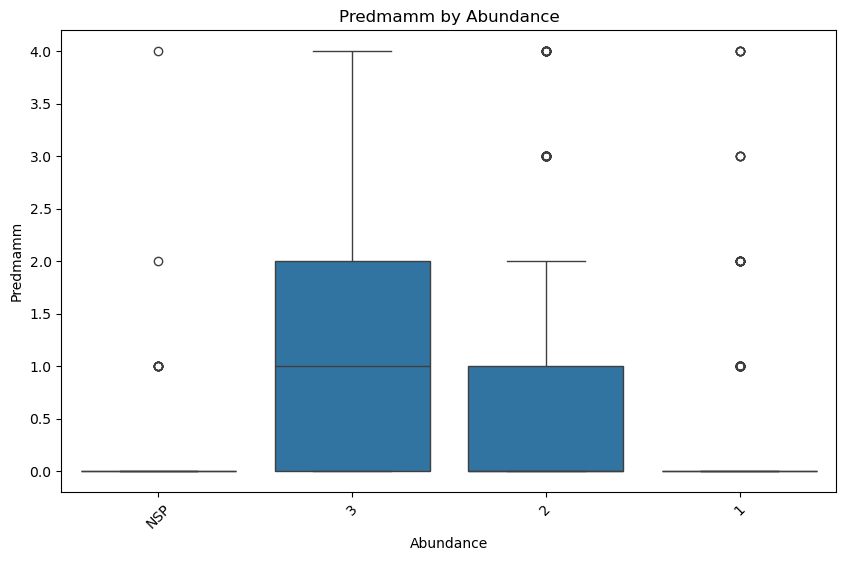

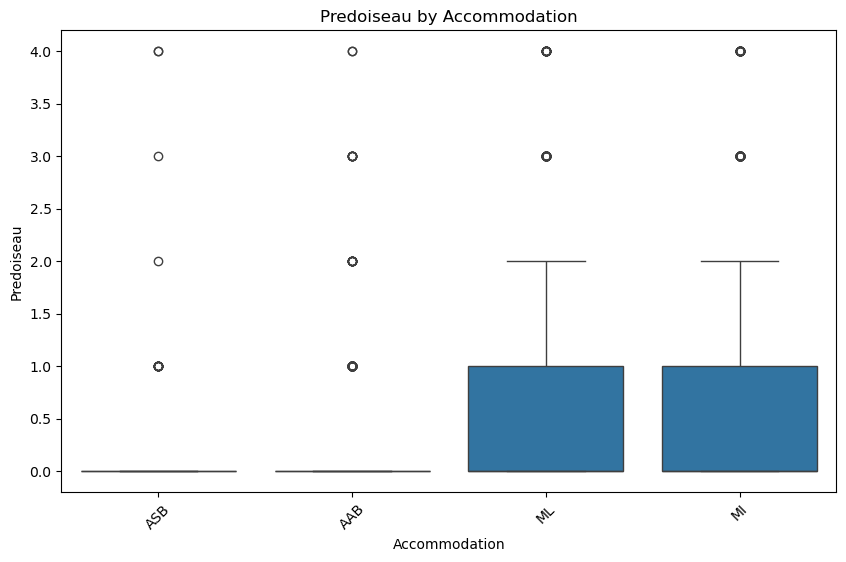

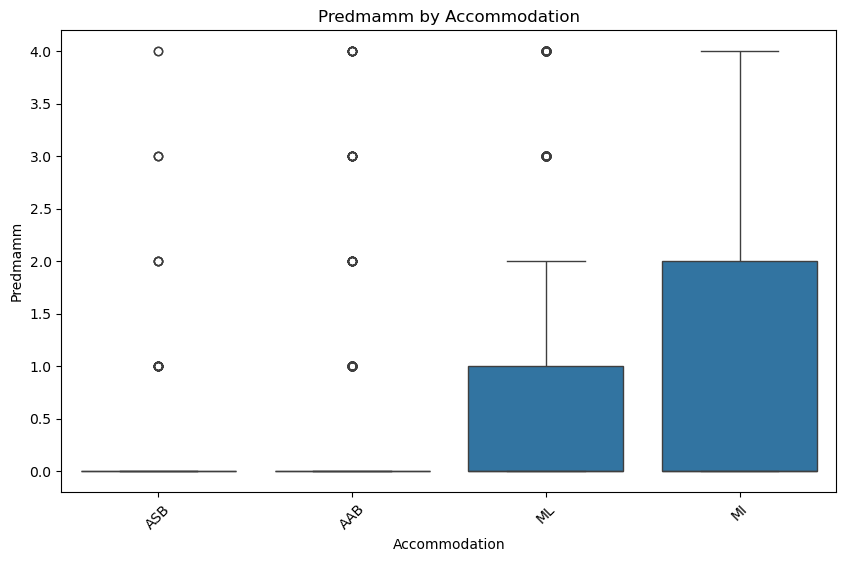

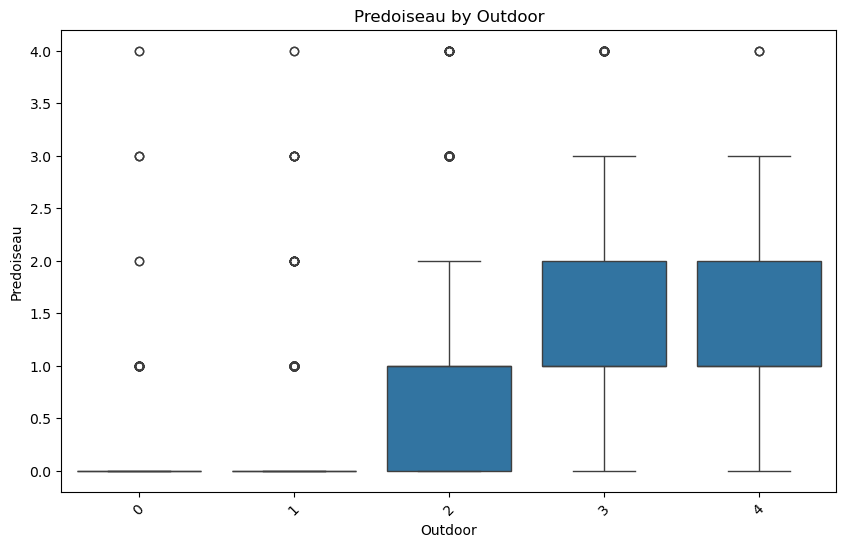

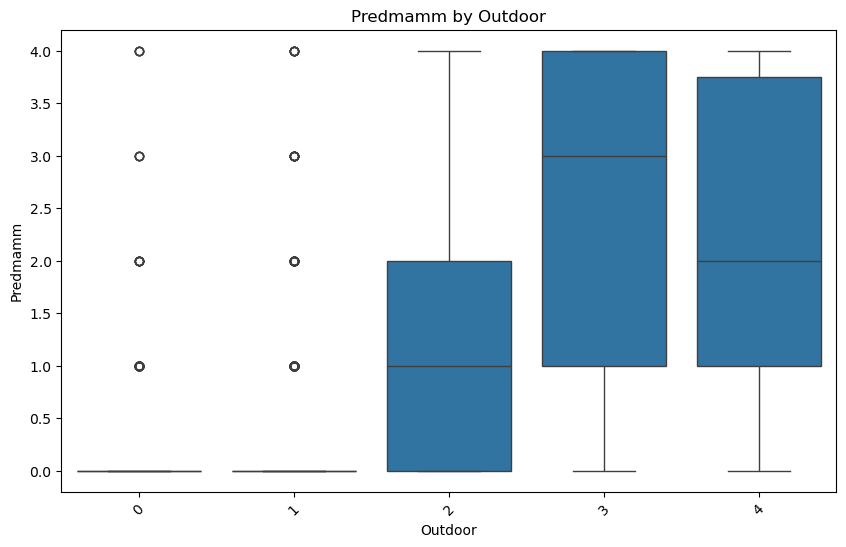

In [21]:
#plotting box plots for age, accomodatiion, area, outdoor and abundance to visually observe variance
for column in columns_to_test:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Predoiseau', data=df)
    plt.title(f'Predoiseau by {column}')
    plt.xticks(rotation=45)
    plt.show()


    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Predmamm', data=df)
    plt.title(f'Predmamm by {column}')
    plt.xticks(rotation=45)
    plt.show()

In [22]:
#confirm variance and statisical significance
for column in columns_to_test:
    print(f"\nMean Predoiseau and Predmamm by {column}:")
    print(df.groupby(column)[['Predoiseau', 'Predmamm']].mean())


Mean Predoiseau and Predmamm by Age:
          Predoiseau  Predmamm
Age                           
1a2         0.384117  0.585089
2a10        0.583333  0.850641
Moinsde1    0.200000  0.322951
Plusde10    0.547753  0.761236

Mean Predoiseau and Predmamm by Area:
      Predoiseau  Predmamm
Area                      
PU      0.495098  0.689951
R       0.685412  1.064385
U       0.199091  0.260909

Mean Predoiseau and Predmamm by Abundance:
           Predoiseau  Predmamm
Abundance                      
1            0.088235  0.134454
2            0.326675  0.433608
3            0.831839  1.253363
NSP          0.041667  0.058333

Mean Predoiseau and Predmamm by Accommodation:
               Predoiseau  Predmamm
Accommodation                      
AAB              0.153061  0.207908
ASB              0.072973  0.118919
MI               0.737263  1.151848
ML               0.586032  0.805668

Mean Predoiseau and Predmamm by Outdoor:
         Predoiseau  Predmamm
Outdoor                      


### **Justifications for Keeping Features**

1. **`Age`:**  
   Age significantly differentiates predation behavior, as shown by clear variations in mean `Predoiseau` and `Predmamm` across age categories, aligning with biological expectations of hunting proficiency at different life stages.

2. **`Area`:**  
   Area strongly influences predation preferences, with significant differences in mean `Predoiseau` and `Predmamm` between urban, rural, and peri-urban categories, reflecting environmental availability of prey types.

3. **`Abundance`:**  
   Abundance is the strongest predictor, with dramatic differences in predation behavior across prey abundance levels, directly tying this feature to hunting opportunities and outcomes.

4. **`Accommodation`:**  
   Accommodation shapes predation behavior, with substantial variation in mean `Predoiseau` and `Predmamm` between living environments, highlighting how access to outdoor spaces impacts hunting activity.

5. **`Outdoor`:**  
   Outdoor time demonstrates a very strong relationship with predation behavior, as evidenced by its extremely low p-values in ANOVA. The clear hierarchy in outdoor levels (e.g., "None" to "All the time") reflects the significant influence of outdoor exposure on a cat's access to prey and hunting activity.


# Further Feature Selection

Reducing dimensionality based on the research guidelines to personality.

In [23]:
#further reducing dimensionality based on research
# Calculate weighted factors based on the research diagram

# Extraversion
df['Extraversion'] = (
    0.7 * df['Vigilant'] +
    0.7 * df['Perseverant']
)

# Dominance
df['Dominance'] = (
    0.8 * df['Impulsive'] +
    0.6 * df['Brutal'] +
    0.6 * df['Aggressive'] +
    0.6 * df['Dominant']
)

# Neuroticism
df['Neuroticism'] = (
    0.6 * df['Afraid'] +
    0.4 * df['Lonely'] +
    0.3 * df['Calm']
)

# Agreeableness
df['Agreeableness'] = (
    0.5 * df['Affectionate'] +
    0.5 * df['Friendly'] +
    0.4 * df['Predictable'] +
    0.4 * df['Distracted']
)


In [24]:
df.shape #shape after adding 4 columns

(3143, 27)

In [25]:
personality_traits = ['Calm', 'Afraid', 'Vigilant', 'Perseverant',
                      'Affectionate', 'Friendly', 'Lonely', 'Brutal', 'Dominant',
                      'Aggressive', 'Impulsive', 'Predictable', 'Distracted']
df = df.drop(columns=personality_traits)

df.shape #shape after removing unnecessary personlaity columns

(3143, 14)

In [26]:
df.head()

,Age,Accommodation,Area,Outdoor,Obs,Timid,Intelligent,Abundance,Predoiseau,Predmamm,Extraversion,Dominance,Neuroticism,Agreeableness
0,Moinsde1,ASB,U,0,0,1,1,NSP,4,4,1.4,2.6,1.3,1.8
1,Moinsde1,AAB,U,0,2,1,4,NSP,0,0,6.3,7.4,2.5,7.8
2,2a10,ML,U,0,2,4,5,NSP,0,0,6.3,3.4,3.8,6.9
3,Moinsde1,ML,R,2,2,3,4,3,0,0,5.6,8.4,3.0,7.2
4,1a2,MI,R,1,2,1,5,3,0,0,4.9,7.4,2.2,5.4


**Row Filtering**



**Justifications for Removed Data**

1. **NSP in `Abundance`:**  
   Rows with `NSP` in `Abundance` were removed because they represent "Not Specified" values, contributing no meaningful information to the analysis and potentially introducing noise.

2. **Cats Less Than 1 Year Old (`Moinsde1` in `Age`):**  
   Cats under 1 year of age were removed as their hunting behaviors are likely underdeveloped, making their data less reliable for predicting predation behavior.

3. **Rows with `Obs = 0`:**  
   Rows where owners reported zero observation time were removed because no reliable data could be collected without adequate time spent observing the cat's behavior.

4. **Rows with `Obs = 1`:**  
   Rows with minimal observation time (1 hour or equivalent) were removed due to concerns about the accuracy and reliability of the reported behavior data.


In [27]:
# Check counts of 'NSP' Abundance and cats less than 1 year old
print("Count of NSP in Abundance:", df[df['Abundance'] == 'NSP'].shape[0])

print("Count of cats less than 1 year old :", df[df["Age"] == "Moinsde1"].shape[0])
# Count rows where Obs is 0 or 1
obs_counts = df["Obs"].value_counts()

print(f"Count of rows with Obs = 0: {obs_counts.get(0, 0)}")
print(f"Count of rows with Obs = 1: {obs_counts.get(1, 0)}")



Count of NSP in Abundance: 240
Count of cats less than 1 year old : 610
Count of rows with Obs = 0: 9
Count of rows with Obs = 1: 323


In [28]:


df = df[df['Abundance'] != 'NSP']

df = df[df['Age'] != 'Moinsde1']


df = df[~df['Obs'].isin([0, 1])]



print(f"Dataset size after filtering: {df.shape}")


Dataset size after filtering: (2075, 14)


In [29]:
#now that we removed rows from owners with low time spent with their cats,
# we can further simplify our dataset by removing the obs feature column

df = df.drop(columns=['Obs'])

df.shape

(2075, 13)

In [30]:
df.head()

,Age,Accommodation,Area,Outdoor,Timid,Intelligent,Abundance,Predoiseau,Predmamm,Extraversion,Dominance,Neuroticism,Agreeableness
4,1a2,MI,R,1,1,5,3,0,0,4.9,7.4,2.2,5.4
5,Plusde10,MI,R,1,4,4,3,0,0,5.6,2.6,4.0,6.0
7,2a10,MI,R,0,4,5,3,0,0,3.5,3.8,3.2,4.3
8,2a10,MI,R,0,2,4,3,0,0,5.6,2.6,2.6,5.6
11,2a10,MI,R,1,5,5,3,0,0,7.0,3.8,6.2,5.7


Final Step of Preprocessing:

**One-hot encoding**

We will do this for age, accomodation, area, and abundance,

no need to do it for outdoor since it is already encoded in an ordinal encoding

In [31]:
# List of categorical columns to encode
categorical_columns = ['Age', 'Accommodation', 'Area', 'Abundance']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



In [32]:
df_encoded.head()

,Outdoor,Timid,Intelligent,Predoiseau,Predmamm,Extraversion,Dominance,Neuroticism,Agreeableness,Age_2a10,Age_Plusde10,Accommodation_ASB,Accommodation_MI,Accommodation_ML,Area_R,Area_U,Abundance_2,Abundance_3
4,1,1,5,0,0,4.9,7.4,2.2,5.4,False,False,False,True,False,True,False,False,True
5,1,4,4,0,0,5.6,2.6,4.0,6.0,False,True,False,True,False,True,False,False,True
7,0,4,5,0,0,3.5,3.8,3.2,4.3,True,False,False,True,False,True,False,False,True
8,0,2,4,0,0,5.6,2.6,2.6,5.6,True,False,False,True,False,True,False,False,True
11,1,5,5,0,0,7.0,3.8,6.2,5.7,True,False,False,True,False,True,False,False,True



**Lets make sure our work is done by double checking everything**

In [33]:
df_encoded.shape

(2075, 18)

In [34]:
print("Missing values per column:")
print(df_encoded.isnull().sum())

#no missing valuues


Missing values per column:
Outdoor              0
Timid                0
Intelligent          0
Predoiseau           0
Predmamm             0
Extraversion         0
Dominance            0
Neuroticism          0
Agreeableness        0
Age_2a10             0
Age_Plusde10         0
Accommodation_ASB    0
Accommodation_MI     0
Accommodation_ML     0
Area_R               0
Area_U               0
Abundance_2          0
Abundance_3          0
dtype: int64


In [35]:
print(df_encoded.dtypes)
#correct data types


Outdoor                int64
Timid                  int64
Intelligent            int64
Predoiseau             int64
Predmamm               int64
Extraversion         float64
Dominance            float64
Neuroticism          float64
Agreeableness        float64
Age_2a10                bool
Age_Plusde10            bool
Accommodation_ASB       bool
Accommodation_MI        bool
Accommodation_ML        bool
Area_R                  bool
Area_U                  bool
Abundance_2             bool
Abundance_3             bool
dtype: object


In [36]:
# Check class distribution for Predoiseau
print("Class distribution for Predoiseau:")
print(df_encoded['Predoiseau'].value_counts(normalize=True) * 100)  # Display percentages

Class distribution for Predoiseau:
Predoiseau
0    68.048193
1    19.036145
2     6.843373
3     4.096386
4     1.975904
Name: proportion, dtype: float64


In [37]:
# Check class distribution for Predmamm

print("\nClass distribution for Predmamm:")
print(df_encoded['Predmamm'].value_counts(normalize=True) * 100)  # Display percentages


Class distribution for Predmamm:
Predmamm
0    63.614458
1    15.325301
2     7.277108
4     7.228916
3     6.554217
Name: proportion, dtype: float64


In [38]:
print(df_encoded['Outdoor'].value_counts(normalize=True) * 100)  # Display percentages

Outdoor
0    35.084337
2    29.831325
1    21.638554
3    12.771084
4     0.674699
Name: proportion, dtype: float64


In [39]:
#Class imabalance solution. combining 3rd and 4th fields
df_encoded['Predoiseau'] = df_encoded['Predoiseau'].replace({4: 3})
df_encoded['Predmamm'] = df_encoded['Predmamm'].replace({4: 3})
print("Class distribution for Predoiseau:")
print(df_encoded['Predoiseau'].value_counts(normalize=True) * 100)  # Display percentages
print("\nClass distribution for Predmamm:")
print(df_encoded['Predmamm'].value_counts(normalize=True) * 100)  # Display percentages

Class distribution for Predoiseau:
Predoiseau
0    68.048193
1    19.036145
2     6.843373
3     6.072289
Name: proportion, dtype: float64

Class distribution for Predmamm:
Predmamm
0    63.614458
1    15.325301
3    13.783133
2     7.277108
Name: proportion, dtype: float64


We ran into problems with class imbalance and had to decide as team what to do.

In [41]:
# Save the DataFrame as a CSV file
df_encoded.to_csv('processed_dataset.csv', index=False)

# If using Google Colab, download the file
# from google.colab import files
# files.download('processed_dataset.csv')


In [42]:
df_encoded.head()

,Outdoor,Timid,Intelligent,Predoiseau,Predmamm,Extraversion,Dominance,Neuroticism,Agreeableness,Age_2a10,Age_Plusde10,Accommodation_ASB,Accommodation_MI,Accommodation_ML,Area_R,Area_U,Abundance_2,Abundance_3
4,1,1,5,0,0,4.9,7.4,2.2,5.4,False,False,False,True,False,True,False,False,True
5,1,4,4,0,0,5.6,2.6,4.0,6.0,False,True,False,True,False,True,False,False,True
7,0,4,5,0,0,3.5,3.8,3.2,4.3,True,False,False,True,False,True,False,False,True
8,0,2,4,0,0,5.6,2.6,2.6,5.6,True,False,False,True,False,True,False,False,True
11,1,5,5,0,0,7.0,3.8,6.2,5.7,True,False,False,True,False,True,False,False,True


In [43]:
# Split the dataset into features and target variables
X = df_encoded.drop(columns=['Predoiseau', 'Predmamm'])
y_birds = df_encoded['Predoiseau']
y_mice = df_encoded['Predmamm']

# Split the dataset into training and testing sets
X_train_birds, X_test_birds, y_train_birds, y_test_birds = train_test_split(X, y_birds, test_size=0.2, random_state=42)
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(X, y_mice, test_size=0.2, random_state=42)

# Decision Tree Classifier

In [44]:

# Initialize the Decision Tree Classifier
decision_tree_birds = DecisionTreeClassifier(random_state=42)
decision_tree_mice = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_birds.fit(X_train_birds, y_train_birds)
decision_tree_mice.fit(X_train_mice, y_train_mice)

# Make predictions on the testing data
y_pred_birds = decision_tree_birds.predict(X_test_birds)
y_pred_mice = decision_tree_mice.predict(X_test_mice)

# Classification report for Predoiseau
print("Classification report for Predoiseau:")
print(classification_report(y_test_birds, y_pred_birds))

# Classification report for Predmamm
print("\nClassification report for Predmamm:")
print(classification_report(y_test_mice, y_pred_mice))

Classification report for Predoiseau:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       280
           1       0.24      0.26      0.25        76
           2       0.15      0.15      0.15        34
           3       0.09      0.12      0.10        25

    accuracy                           0.58       415
   macro avg       0.32      0.32      0.32       415
weighted avg       0.61      0.58      0.59       415


Classification report for Predmamm:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       269
           1       0.16      0.21      0.18        57
           2       0.16      0.24      0.19        29
           3       0.40      0.33      0.36        60

    accuracy                           0.58       415
   macro avg       0.39      0.38      0.38       415
weighted avg       0.62      0.58      0.60       415



In [45]:
#determine standard deviation of the model
residuals_birds = y_test_birds - y_pred_birds
residuals_mice = y_test_mice - y_pred_mice

# Average Error for Predoiseau
avg_error_birds = abs(residuals_birds).mean()
print(f"\nAverage Error for Predoiseau: {avg_error_birds}")

# Average Error for Predmamm
avg_error_mice = abs(residuals_mice).mean()
print(f"Average Error for Predmamm: {avg_error_mice}")


Average Error for Predoiseau: 0.619277108433735
Average Error for Predmamm: 0.6433734939759036


In [46]:
#same for random forest
# Initialize the Random Forest Classifier
random_forest_birds = RandomForestClassifier(random_state=42)
random_forest_mice = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_birds.fit(X_train_birds, y_train_birds)
random_forest_mice.fit(X_train_mice, y_train_mice)

# Make predictions on the testing data
y_pred_birds_rf = random_forest_birds.predict(X_test_birds)
y_pred_mice_rf = random_forest_mice.predict(X_test_mice)

# Classification report for Predoiseau
print("Classification report for Predoiseau (Random Forest):")
print(classification_report(y_test_birds, y_pred_birds_rf))

# Classification report for Predmamm
print("\nClassification report for Predmamm (Random Forest):")
print(classification_report(y_test_mice, y_pred_mice_rf))

Classification report for Predoiseau (Random Forest):
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       280
           1       0.31      0.32      0.31        76
           2       0.46      0.18      0.26        34
           3       0.56      0.20      0.29        25

    accuracy                           0.70       415
   macro avg       0.53      0.40      0.43       415
weighted avg       0.67      0.70      0.67       415


Classification report for Predmamm (Random Forest):
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       269
           1       0.17      0.12      0.14        57
           2       0.20      0.03      0.06        29
           3       0.51      0.53      0.52        60

    accuracy                           0.68       415
   macro avg       0.42      0.40      0.39       415
weighted avg       0.63      0.68      0.65       415



In [47]:
#determine standard deviation of the model
residuals_birds_rf = y_test_birds - y_pred_birds_rf
residuals_mice_rf = y_test_mice - y_pred_mice_rf

# Average Error for Predoiseau
avg_error_birds_rf = abs(residuals_birds_rf).mean()
print(f"\nAverage Error for Predoiseau (Random Forest): {avg_error_birds_rf}")

# Average Error for Predmamm
avg_error_mice_rf = abs(residuals_mice_rf).mean()
print(f"Average Error for Predmamm (Random Forest): {avg_error_mice_rf}")


Average Error for Predoiseau (Random Forest): 0.39759036144578314
Average Error for Predmamm (Random Forest): 0.5156626506024097


In [48]:
print("F1 score for Predoiseau (Random Forest):")
print(f1_score(y_test_birds, y_pred_birds_rf, average='weighted'))
print("F1 score for Predmamm (Random Forest):")
print(f1_score(y_test_mice, y_pred_mice_rf, average='weighted'))

F1 score for Predoiseau (Random Forest):
0.6711678255807415
F1 score for Predmamm (Random Forest):
0.6483252444567524


In [49]:
importances_birds = random_forest_birds.feature_importances_
importances_mice = random_forest_mice.feature_importances_
feature_names_birds = X_train_birds.columns
feature_names_mice = X_train_mice.columns
feature_importance_df_birds = pd.DataFrame({
    'Feature': feature_names_birds,
    'Importance': importances_birds
})

feature_importance_df = feature_importance_df_birds.sort_values(by='Importance', ascending=False)

print("Feature importance chart for Predoiseau (Random Forest):")
print(feature_importance_df_birds.head(5))

feature_importance_df_mice = pd.DataFrame({
    'Feature': feature_names_mice,
    'Importance': importances_mice
})

print("Feature importance chart for Predmamm (Random Forest):")
feature_importance_df = feature_importance_df_mice.sort_values(by='Importance', ascending=False)

print(feature_importance_df_mice.head(5))

Feature importance chart for Predoiseau (Random Forest):
        Feature  Importance
0       Outdoor    0.203814
1         Timid    0.068326
2   Intelligent    0.047651
3  Extraversion    0.079137
4     Dominance    0.135807
Feature importance chart for Predmamm (Random Forest):
        Feature  Importance
0       Outdoor    0.207005
1         Timid    0.064657
2   Intelligent    0.045505
3  Extraversion    0.077203
4     Dominance    0.128674


In [50]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest Classifier with class weighting and stratified cv technique
random_forest_birds_weighted = RandomForestClassifier(class_weight='balanced',random_state=42)
random_forest_mice_weighted = RandomForestClassifier(class_weight='balanced',random_state=42)

# Fit the model to the training data
random_forest_birds_weighted.fit(X_train_birds, y_train_birds)
random_forest_mice_weighted.fit(X_train_mice, y_train_mice)

# Make predictions on the testing data
y_pred_birds_rf_weighted = random_forest_birds_weighted.predict(X_test_birds)
y_pred_mice_rf_weighted = random_forest_mice_weighted.predict(X_test_mice)

#CV scores
scores_birds = cross_val_score(random_forest_birds_weighted,X_train_birds,y_train_birds,cv=cv,scoring ='accuracy')
scores_mice = cross_val_score(random_forest_mice_weighted,X_train_mice,y_train_mice,cv=cv,scoring='accuracy')


# Print out the results for each model
print("Classification report for Predoiseau (Random Forest) with weights and cross validation:")
print(classification_report(y_test_birds,y_pred_birds_rf_weighted))
print("Cross-validation scores for Predoiseau (Random Forest) with weights and cross validation:")
print(scores_birds)
print("Classification report for Predmamm (Random Forest) with weights and cross validation:")
print(classification_report(y_test_mice,y_pred_mice_rf_weighted))
print("Cross-validation scores for Predmamm (Random Forest) with weights and cross validation:")
print(scores_mice)


Classification report for Predoiseau (Random Forest) with weights and cross validation:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       280
           1       0.32      0.30      0.31        76
           2       0.36      0.12      0.18        34
           3       0.20      0.04      0.07        25

    accuracy                           0.69       415
   macro avg       0.42      0.35      0.35       415
weighted avg       0.63      0.69      0.65       415

Cross-validation scores for Predoiseau (Random Forest) with weights and cross validation:
[0.71084337 0.69578313 0.69879518 0.6746988  0.69277108]
Classification report for Predmamm (Random Forest) with weights and cross validation:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       269
           1       0.17      0.12      0.14        57
           2       0.00      0.00      0.00        29
           3       0.46    

In [51]:
#determine standard deviation of the model
residuals_birds_rf_weighted = y_test_birds - y_pred_birds_rf_weighted
residuals_mice_rf_weighted = y_test_mice - y_pred_mice_rf_weighted

# Average Error for Predoiseau
avg_error_birds_rf = abs(residuals_birds_rf_weighted).mean()
print(f"\nAverage Error for Predoiseau (Random Forest) with weights and cross validation: {avg_error_birds_rf}")

# Average Error for Predmamm
avg_error_mice_rf = abs(residuals_mice_rf_weighted).mean()
print(f"Average Error for Predmamm (Random Forest) with weights and cross validation: {avg_error_mice_rf}")


Average Error for Predoiseau (Random Forest) with weights and cross validation: 0.42891566265060244
Average Error for Predmamm (Random Forest) with weights and cross validation: 0.5493975903614458


In [52]:
print("F1 score for Predoiseau (Random Forest) with weights and cross validation:")
print(f1_score(y_test_birds, y_pred_birds_rf_weighted, average='weighted'))
print("F1 score for Predmamm (Random Forest) weight weights and cross validation:")
print(f1_score(y_test_mice, y_pred_mice_rf_weighted, average='weighted'))

F1 score for Predoiseau (Random Forest) with weights and cross validation:
0.6490501132123967
F1 score for Predmamm (Random Forest) weight weights and cross validation:
0.6352768717507604


In [53]:
#feature importance after weights and cross-validation

importances_birds = random_forest_birds_weighted.feature_importances_
importances_mice = random_forest_mice_weighted.feature_importances_
feature_names_birds = X_train_birds.columns
feature_names_mice = X_train_mice.columns
feature_importance_df_birds = pd.DataFrame({
    'Feature': feature_names_birds,
    'Importance': importances_birds
})

feature_importance_df = feature_importance_df_birds.sort_values(by='Importance', ascending=False)

print(feature_importance_df_birds.head(5))

feature_importance_df_mice = pd.DataFrame({
    'Feature': feature_names_mice,
    'Importance': importances_mice
})

feature_importance_df = feature_importance_df_mice.sort_values(by='Importance', ascending=False)

print(feature_importance_df_mice.head(5))

        Feature  Importance
0       Outdoor    0.159168
1         Timid    0.070894
2   Intelligent    0.049911
3  Extraversion    0.078191
4     Dominance    0.146418
        Feature  Importance
0       Outdoor    0.150596
1         Timid    0.072877
2   Intelligent    0.046649
3  Extraversion    0.081332
4     Dominance    0.140956


In [54]:
import numpy as np

# Check the distribution of classes in the training set
print(np.bincount(y_train_birds))
print(np.bincount(y_train_mice))

# Or for unique counts per class
print(np.unique(y_train_birds, return_counts=True))
print(np.unique(y_train_mice, return_counts=True))

[1132  319  108  101]
[1051  261  122  226]
(array([0, 1, 2, 3]), array([1132,  319,  108,  101]))
(array([0, 1, 2, 3]), array([1051,  261,  122,  226]))


In [55]:
#With SMOTE
smote = SMOTE(random_state=42)

X_train_birds_resampled, y_train_birds_resampled = smote.fit_resample(X_train_birds, y_train_birds)
X_train_mice_resampled, y_train_mice_resampled = smote.fit_resample(X_train_mice, y_train_mice)

random_forest_birds_weighted.fit(X_train_birds_resampled, y_train_birds_resampled)
random_forest_mice_weighted.fit(X_train_mice_resampled, y_train_mice_resampled)

y_pred_birds_rf_weighted = random_forest_birds_weighted.predict(X_test_birds)
y_pred_mice_rf_weighted = random_forest_mice_weighted.predict(X_test_mice)

scores_birds = cross_val_score(random_forest_birds_weighted,X_train_birds,y_train_birds,cv=cv,scoring ='accuracy')
scores_mice = cross_val_score(random_forest_mice_weighted,X_train_mice,y_train_mice,cv=cv,scoring='accuracy')

# Print out the results for each model
print("Classification report for Predoiseau (Random Forest) with weights, cross validation and up-sampling:")
print(classification_report(y_test_birds,y_pred_birds_rf_weighted))
print("Cross-validation scores for Predoiseau (Random Forest) with weights, cross validation and up-sampling:")
print(scores_birds)
print("Classification report for Predmamm (Random Forest) with weights, cross validation and up-sampling:")
print(classification_report(y_test_mice,y_pred_mice_rf_weighted))
print("Cross-validation scores for Predmamm (Random Forest) with weights, cross validation and up-sampling:")
print(scores_mice)

Classification report for Predoiseau (Random Forest) with weights, cross validation and up-sampling:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       280
           1       0.34      0.39      0.36        76
           2       0.38      0.18      0.24        34
           3       0.17      0.20      0.18        25

    accuracy                           0.67       415
   macro avg       0.43      0.40      0.41       415
weighted avg       0.67      0.67      0.67       415

Cross-validation scores for Predoiseau (Random Forest) with weights, cross validation and up-sampling:
[0.71084337 0.69578313 0.69879518 0.6746988  0.69277108]
Classification report for Predmamm (Random Forest) with weights, cross validation and up-sampling:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       269
           1       0.21      0.28      0.24        57
           2       0.09      0.07      0.0

In [56]:
#determine standard deviation of the model
residuals_birds_rf_weighted = y_test_birds - y_pred_birds_rf_weighted
residuals_mice_rf_weighted = y_test_mice - y_pred_mice_rf_weighted

# Average Error for Predoiseau
avg_error_birds_rf = abs(residuals_birds_rf_weighted).mean()
print(f"\nAverage Error for Predoiseau (Random Forest) with weights and cross validation: {avg_error_birds_rf}")

# Average Error for Predmamm
avg_error_mice_rf = abs(residuals_mice_rf_weighted).mean()
print(f"Average Error for Predmamm (Random Forest) with weights and cross validation: {avg_error_mice_rf}")


Average Error for Predoiseau (Random Forest) with weights and cross validation: 0.46265060240963857
Average Error for Predmamm (Random Forest) with weights and cross validation: 0.5662650602409639


In [57]:
print("F1 score for Predoiseau (Random Forest) with weights, cross validation and up-sampling:")
print(f1_score(y_test_birds, y_pred_birds_rf_weighted, average='weighted'))
print("F1 score for Predmamm (Random Forest) weight weights, cross validation and up-sampling:")
print(f1_score(y_test_mice, y_pred_mice_rf_weighted, average='weighted'))

F1 score for Predoiseau (Random Forest) with weights, cross validation and up-sampling:
0.6682935377875138
F1 score for Predmamm (Random Forest) weight weights, cross validation and up-sampling:
0.6413442242314094


In [58]:
#feature importance after SMOTE, weights, cross validation

importances_birds = random_forest_birds_weighted.feature_importances_
importances_mice = random_forest_mice_weighted.feature_importances_
feature_names_birds = X_train_birds_resampled.columns
feature_names_mice = X_train_mice_resampled.columns
feature_importance_df_birds = pd.DataFrame({
    'Feature': feature_names_birds,
    'Importance': importances_birds
})

feature_importance_df = feature_importance_df_birds.sort_values(by='Importance', ascending=False)

print(feature_importance_df_birds.head(5))

feature_importance_df_mice = pd.DataFrame({
    'Feature': feature_names_mice,
    'Importance': importances_mice
})

feature_importance_df = feature_importance_df_mice.sort_values(by='Importance', ascending=False)

print(feature_importance_df_mice.head(5))


        Feature  Importance
0       Outdoor    0.132218
1         Timid    0.064294
2   Intelligent    0.045927
3  Extraversion    0.103786
4     Dominance    0.149648
        Feature  Importance
0       Outdoor    0.136270
1         Timid    0.062547
2   Intelligent    0.046011
3  Extraversion    0.100754
4     Dominance    0.139081


In [59]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

random_forest_birds_weighted = RandomForestClassifier(random_state=42)
random_forest_mice_weighted = RandomForestClassifier(random_state=42)


param_grid_birds = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None],
}

param_grid_mice = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None],
}


grid_search_birds = GridSearchCV(estimator=random_forest_birds_weighted, param_grid=param_grid_birds, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search_mice = GridSearchCV(estimator=random_forest_mice_weighted, param_grid=param_grid_mice, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search_birds.fit(X_train_birds, y_train_birds)
grid_search_mice.fit(X_train_mice, y_train_mice)

print("Best hyperparameters for Predoiseau (Random Forest):", grid_search_birds.best_params_)
print("Best cross-validation score for Predoiseau (Random Forest):", grid_search_birds.best_score_)

print("Best hyperparameters for Predmamm (Random Forest):", grid_search_mice.best_params_)
print("Best cross-validation score for Predmamm (Random Forest):", grid_search_mice.best_score_)

best_rf_birds = grid_search_birds.best_estimator_
best_rf_mice = grid_search_mice.best_estimator_

y_pred_birds_rf_weighted = best_rf_birds.predict(X_test_birds)
y_pred_mice_rf_weighted = best_rf_mice.predict(X_test_mice)

print("Classification report for Predoiseau (Random Forest) with best hyperparameters:")
print(classification_report(y_test_birds, y_pred_birds_rf_weighted))

print("Classification report for Predmamm (Random Forest) with best hyperparameters:")
print(classification_report(y_test_mice, y_pred_mice_rf_weighted))

scores_birds = grid_search_birds.cv_results_['mean_test_score']
scores_mice = grid_search_mice.cv_results_['mean_test_score']

print("Cross-validation scores for Birds:")
print(scores_birds)
print("Cross-validation scores for Mice:")
print(scores_mice)

residuals_birds_rf_weighted = y_test_birds - y_pred_birds_rf_weighted
residuals_mice_rf_weighted = y_test_mice - y_pred_mice_rf_weighted

# Average Error for Predoiseau
avg_error_birds_rf = abs(residuals_birds_rf_weighted).mean()
print(f"\nAverage Error for Predoiseau (Random Forest) with weights and cross validation: {avg_error_birds_rf}")

# Average Error for Predmamm
avg_error_mice_rf = abs(residuals_mice_rf_weighted).mean()
print(f"Average Error for Predmamm (Random Forest) with weights and cross validation: {avg_error_mice_rf}")

Best hyperparameters for Predoiseau (Random Forest): {'class_weight': None, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score for Predoiseau (Random Forest): 0.7048192771084337
Best hyperparameters for Predmamm (Random Forest): {'class_weight': None, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score for Predmamm (Random Forest): 0.7132530120481928
Classification report for Predoiseau (Random Forest) with best hyperparameters:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       280
           1       0.32      0.39      0.36        76
           2       0.50      0.09      0.15        34
           3       0.00      0.00      0.00        25

    accuracy                           0.69       415
   macro avg       0.41      0.35      0.34       415
weighted avg       0.65      0.69      0.65       415

Classification report for Predmamm (Random Forest) wi

/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
print("F1 score for Predoiseau (Random Forest) with gridsearch:")
print(f1_score(y_test_birds, y_pred_birds_rf_weighted, average='weighted'))
print("F1 score for Predmamm (Random Forest) with gridsearch:")
print(f1_score(y_test_mice, y_pred_mice_rf_weighted, average='weighted'))

F1 score for Predoiseau (Random Forest) with gridsearch:
0.6543217541734688
F1 score for Predmamm (Random Forest) with gridsearch:
0.654881319297122


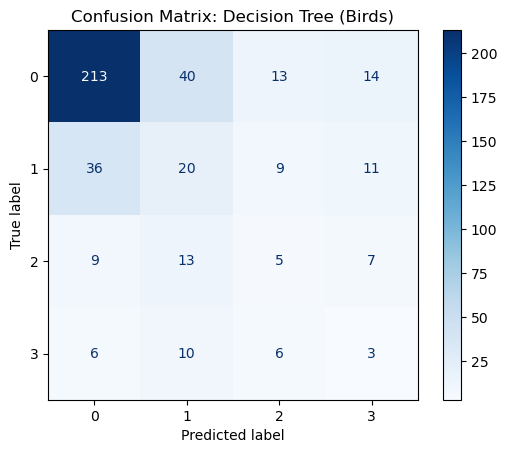

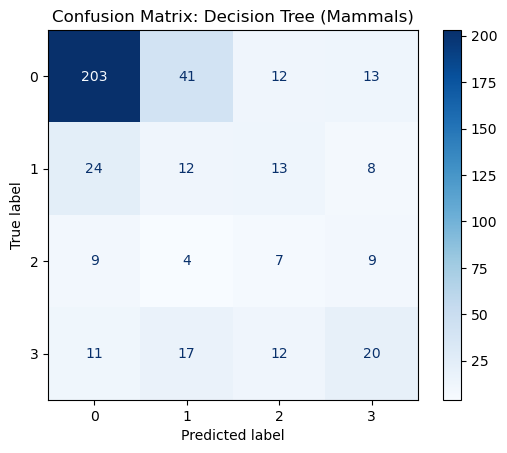

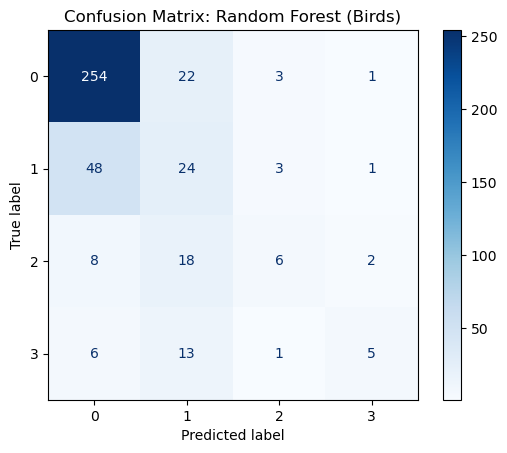

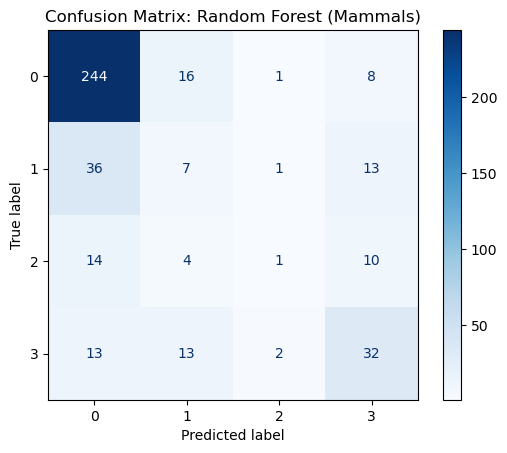

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# birds prediction using Decision Tree
plot_confusion_matrix(y_test_birds, y_pred_birds, title="Confusion Matrix: Decision Tree (Birds)")

# mammals prediction using Decision Tree
plot_confusion_matrix(y_test_mice, y_pred_mice, title="Confusion Matrix: Decision Tree (Mammals)")

# birds prediction using Random Forest
plot_confusion_matrix(y_test_birds, y_pred_birds_rf, title="Confusion Matrix: Random Forest (Birds)")

# mammals prediction using Random Forest
plot_confusion_matrix(y_test_mice, y_pred_mice_rf, title="Confusion Matrix: Random Forest (Mammals)")


In [62]:
df_encoded['Predoiseau'] = df_encoded['Predoiseau'].replace({4: 3})
df_encoded['Predmamm'] = df_encoded['Predmamm'].replace({4: 3})

In [63]:
y_birds = df_encoded['Predoiseau']
y_mice = df_encoded['Predmamm']

# MLP Classifier

In [64]:
# Train and Test MLP Classifier
mlp_birds = mlp(random_state=42)
mlp_mice = mlp(random_state=42)

mlp_birds.fit(X_train_birds, y_train_birds)
mlp_mice.fit(X_train_mice, y_train_mice)

y_pred_birds_mlp = mlp_birds.predict(X_test_birds)
y_pred_mice_mlp = mlp_mice.predict(X_test_mice)

print("Classification report for Predoiseau (MLP):")
print(classification_report(y_test_birds, y_pred_birds_mlp))

print("Classification report for Predmamm (MLP):")
print(classification_report(y_test_mice, y_pred_mice_mlp))

/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification report for Predoiseau (MLP):
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       280
           1       0.32      0.41      0.36        76
           2       0.40      0.12      0.18        34
           3       0.17      0.08      0.11        25

    accuracy                           0.68       415
   macro avg       0.43      0.37      0.38       415
weighted avg       0.66      0.68      0.66       415

Classification report for Predmamm (MLP):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       269
           1       0.23      0.19      0.21        57
           2       0.14      0.03      0.06        29
           3       0.51      0.65      0.57        60

    accuracy                           0.69       415
   macro avg       0.43      0.44      0.42       415
weighted avg       0.65      0.69      0.67       415



/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
# Find Average Error
residuals_birds_mlp = y_test_birds - y_pred_birds_mlp
residuals_mice_mlp = y_test_mice - y_pred_mice_mlp

avg_error_birds_mlp = abs(residuals_birds_mlp).mean()
print(f"\nAverage Error for Predoiseau (MLP): {avg_error_birds_mlp}")

avg_error_mice_mlp = abs(residuals_mice_mlp).mean()
print(f"Average Error for Predmamm (MLP): {avg_error_mice_mlp}")


Average Error for Predoiseau (MLP): 0.4072289156626506
Average Error for Predmamm (MLP): 0.4891566265060241


In [66]:
# Optimize MLP Classifier with Grid Search
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (200,), (300,), (100, 50, 25), (200, 100, 50), (300, 200, 100), (256, 128, 64)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

grid_search_mlp_birds = GridSearchCV(estimator=mlp_birds, param_grid=param_grid_mlp, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_mlp_mice = GridSearchCV(estimator=mlp_mice, param_grid=param_grid_mlp, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search_mlp_birds.fit(X_train_birds, y_train_birds)
grid_search_mlp_mice.fit(X_train_mice, y_train_mice)

print("Best hyperparameters for Predoiseau (MLP):", grid_search_mlp_birds.best_params_)
print("Best cross-validation score for Predoiseau (MLP):", grid_search_mlp_birds.best_score_)

print("Best hyperparameters for Predmamm (MLP):", grid_search_mlp_mice.best_params_)
print("Best cross-validation score for Predmamm (MLP):", grid_search_mlp_mice.best_score_)

/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/CSC466/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/

Best hyperparameters for Predoiseau (MLP): {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (300, 200, 100), 'solver': 'adam'}
Best cross-validation score for Predoiseau (MLP): 0.7271084337349397
Best hyperparameters for Predmamm (MLP): {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (200,), 'solver': 'adam'}
Best cross-validation score for Predmamm (MLP): 0.7186746987951806


In [67]:
# Find Average Error
y_pred_birds_mlp = grid_search_mlp_birds.predict(X_test_birds)
y_pred_mice_mlp = grid_search_mlp_mice.predict(X_test_mice)

residuals_birds_mlp = y_test_birds - y_pred_birds_mlp
residuals_mice_mlp = y_test_mice - y_pred_mice_mlp

avg_error_birds_mlp = abs(residuals_birds_mlp).mean()
print(f"\nAverage Error for Predoiseau (MLP): {avg_error_birds_mlp}")

avg_error_mice_mlp = abs(residuals_mice_mlp).mean()
print(f"Average Error for Predmamm (MLP): {avg_error_mice_mlp}")


Average Error for Predoiseau (MLP): 0.39518072289156625
Average Error for Predmamm (MLP): 0.4843373493975904


# K-Nearest Neighbors

In [68]:
#KNN with k = 5

knn_birds = KNeighborsClassifier(n_neighbors=5)
knn_mice = KNeighborsClassifier(n_neighbors=5)

knn_birds.fit(X_train_birds, y_train_birds)
knn_mice.fit(X_train_mice, y_train_mice)

y_pred_birds = knn_birds.predict(X_test_birds)
y_pred_mice = knn_mice.predict(X_test_mice)

accuracy_birds = accuracy_score(y_test_birds, y_pred_birds)
accuracy_mice = accuracy_score(y_test_mice, y_pred_mice)

print("Accuracy for Predoiseau KNN with K = 5")
print(accuracy_birds)
print("Accuracy for Predmamm KNN with K = 5")
print(accuracy_mice)

#determine standard deviation of the model
residuals_birds = y_test_birds - y_pred_birds
residuals_mice = y_test_mice - y_pred_mice

# Average Error for Predoiseau
avg_error_birds = abs(residuals_birds).mean()
print(f"\nAverage Error for Predoiseau: {avg_error_birds}")

# Average Error for Predmamm
avg_error_mice = abs(residuals_mice).mean()
print(f"Average Error for Predmamm: {avg_error_mice}")


Accuracy for Predoiseau KNN with K = 5
0.689156626506024
Accuracy for Predmamm KNN with K = 5
0.6578313253012048

Average Error for Predoiseau: 0.4650602409638554
Average Error for Predmamm: 0.5686746987951807


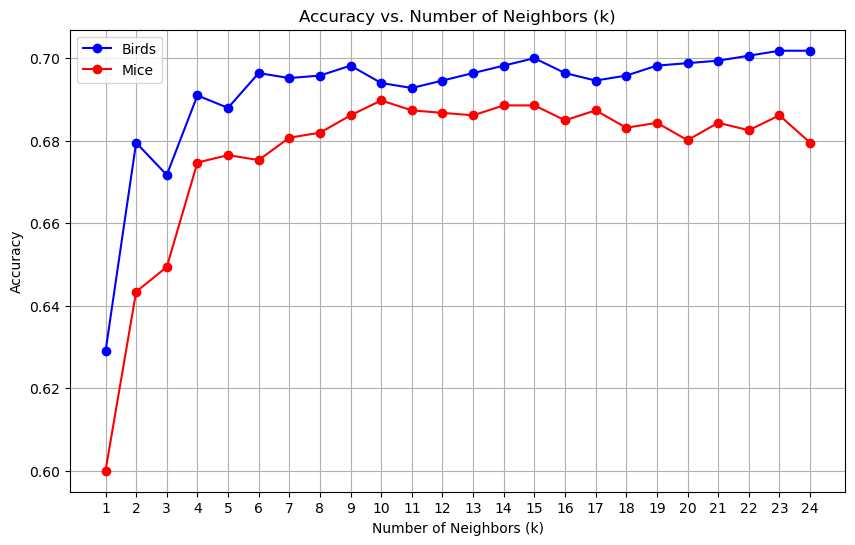

Best value of k for Predoiseau (Birds)
24
Best value of k for Predmamm (Mammals)
10
Accuracy for Predoiseau (Birds) with optimal k
0.7012048192771084
Accuracy for Predmamm (Mammals) with optimal k
0.6843373493975904

Average Error for Predoiseau (Birds): 0.43373493975903615
Average Error for Predmamm (Mammals): 0.5228915662650603


In [69]:
#KNN with hyper-parameter tuning with plotting

k_values = list(range(1, 25))
param_grid = {'n_neighbors': k_values}

knn_birds_tuned = KNeighborsClassifier()
knn_mice_tuned = KNeighborsClassifier()

grid_search_birds = GridSearchCV(estimator=knn_birds_tuned, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_birds.fit(X_train_birds, y_train_birds)

results_birds = grid_search_birds.cv_results_
results_birds_df = pd.DataFrame(results_birds)

plt.figure(figsize=(10, 6))
plt.plot(results_birds_df['param_n_neighbors'], results_birds_df['mean_test_score'], marker='o', linestyle='-', color='b', label='Birds')

grid_search_mice = GridSearchCV(estimator=knn_mice_tuned, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_mice.fit(X_train_mice, y_train_mice)

results_mice = grid_search_mice.cv_results_
results_mice_df = pd.DataFrame(results_mice)

plt.plot(results_mice_df['param_n_neighbors'], results_mice_df['mean_test_score'], marker='o', linestyle='-', color='r', label='Mice')

plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(1, 25))
plt.legend()
plt.show()

best_k_birds = grid_search_birds.best_params_['n_neighbors']
print("Best value of k for Predoiseau (Birds)")
print(best_k_birds)

best_k_mice = grid_search_mice.best_params_['n_neighbors']
print("Best value of k for Predmamm (Mammals)")
print(best_k_mice)

optimal_knn_birds = grid_search_birds.best_estimator_

optimal_knn_mice = grid_search_mice.best_estimator_

y_pred_birds = optimal_knn_birds.predict(X_test_birds)

y_pred_mice = optimal_knn_mice.predict(X_test_mice)

accuracy_birds = accuracy_score(y_test_birds, y_pred_birds)
print("Accuracy for Predoiseau (Birds) with optimal k")
print(accuracy_birds)

accuracy_mice = accuracy_score(y_test_mice, y_pred_mice)
print("Accuracy for Predmamm (Mammals) with optimal k")
print(accuracy_mice)

#determine standard deviation of the model
residuals_birds = y_test_birds - y_pred_birds
residuals_mice = y_test_mice - y_pred_mice

# Average Error for Predoiseau
avg_error_birds = abs(residuals_birds).mean()
print(f"\nAverage Error for Predoiseau (Birds): {avg_error_birds}")

# Average Error for Predmamm
avg_error_mice = abs(residuals_mice).mean()
print(f"Average Error for Predmamm (Mammals): {avg_error_mice}")